## Import Libraries

In [1]:
import re
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [2]:
df = pd.read_csv('Dataset/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing

In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [6]:
df.columns

Index(['label', 'text'], dtype='object')

In [7]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove Punctuation using re
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a text string
    processed_text = ' '.join(tokens)

    return processed_text

In [8]:
# Apply the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [9]:
df['label'] = df['label'].apply(lambda x:1 if x=='spam' else 0)

In [10]:
df.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [11]:
df.isna().sum()

label    0
text     0
dtype: int64

## Creating Model

In [12]:
X = df['text']
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [15]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [16]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [17]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.98

Confusion Matrix:
[[945   4]
 [ 18 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.97      0.89      0.93       166

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



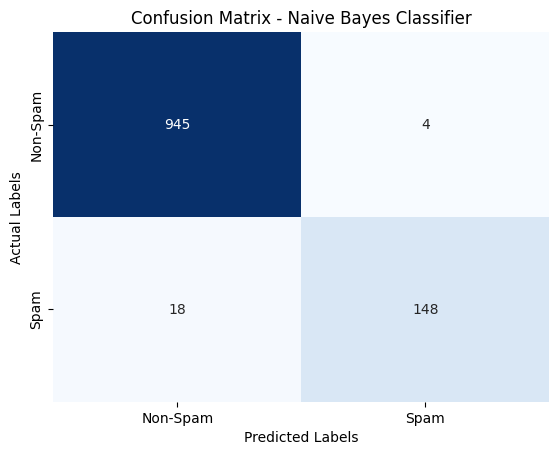

In [18]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')

# Add labels for the classes
class_labels = ['Non-Spam', 'Spam']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the plot
plt.show()

## Save and Load Model

In [19]:
# Save the model to a file
model_file = open('naive_bayes_model.pkl', 'wb')
pickle.dump(nb_classifier, model_file)

In [20]:
# Save the vectorizer to a file
vectorizer_file =  open('count_vectorizer.pkl', 'wb')
pickle.dump(vectorizer, vectorizer_file)

In [21]:
# Load the model from the file
with open('naive_bayes_model.pkl', 'rb') as model_file:
    loaded_nb_model = pickle.load(model_file)

In [22]:
# Save the vectorizer to a file
vectorizer_file =  open('count_vectorizer.pkl', 'rb')
loaded_vectorizer = pickle.load(vectorizer_file)

## Predict Unkown Text

In [23]:
# Example of unknown text
new_text = "Congratulations you won 10000."

In [24]:
# Preprocess the new text (assuming you've already done preprocessing on your training data)
new_text_preprocessed = preprocess_text(new_text)

# Vectorize the new text using the loaded vectorizer
new_text_vectorized = loaded_vectorizer.transform([new_text_preprocessed])

# Predict the label for the new text using the loaded Naive Bayes model
predicted_label = loaded_nb_model.predict(new_text_vectorized)

# Print the predicted label
print(f"Predicted Label: {predicted_label[0]}")

Predicted Label: 1
